In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.covariance import EmpiricalCovariance

## Effects of PCA on Digit Recognition
MNIST is a popular dataset containing 28 by 28 images of handwritten digits. Today we will be exploring the differences between training a standard K Nearest Neighbors classifier on MNIST vs first performing PCA to reduce the dimension of the data and then use a K Nearest Neighbors classifier.

First, load in the dataset and split into training and testing data

In [0]:
mnist = fetch_mldata('MNIST original')
X_train, X_test, y_train, y_test = train_test_split(
    mnist.data.astype('float64'), mnist.target, train_size=60000, test_size=10000)

In [3]:
print("Training images: ", X_train.shape, "Training labels: ", y_train.shape)
print("Testing images: ", X_test.shape, "Testing labels: ", y_test.shape)

Training images:  (60000, 784) Training labels:  (60000,)
Testing images:  (10000, 784) Testing labels:  (10000,)


Train and test a standard K Nearest Neighbors classifier on the original data

In [0]:
clf = KNeighborsClassifier().fit(X_train, y_train)

In [5]:
clf.score(X_test, y_test)

0.9745

To determine how many principle components to use for PCA, let's look at the eigenvalues of the covariance matrix.

In [0]:
cov = EmpiricalCovariance().fit(X_train)
cov = cov.covariance_

In [0]:
L, V = np.linalg.eig(cov)

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


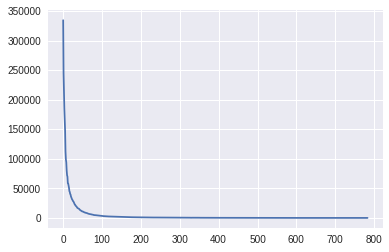

In [8]:
plt.plot(np.arange(len(L)), L)

The eigenvalues seem to quickly trail off so lets look at the first 100 only.

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


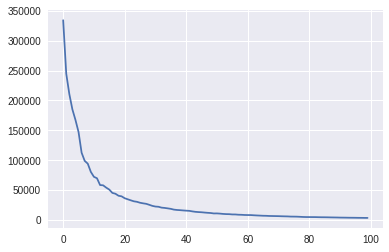

In [9]:
plt.plot(np.arange(100), L[:100])

It seems like the largest eigenvalues are roughly the first 40. We will use 36 prinicple components so the number is square like the original data.

In [10]:
pca = PCA(n_components=36)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=36, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Train and test another default K Nearest Neighbors classifier, but now use the data with reduced dimensions.

In [0]:
X_train_pca = pca.transform(X_train)
clf_pca = KNeighborsClassifier().fit(X_train_pca, y_train)

In [12]:
X_test_pca = pca.transform(X_test)
clf_pca.score(X_test_pca, y_test)

0.9808

Not only does the classifier perform better than the original, it also runs much faster!

Let's look at an image from the original dataset and from the PCA dataset:

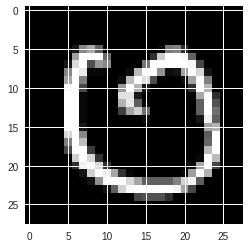

In [13]:
X = X_train[0].reshape(28, 28)
plt.gray()
plt.imshow(X)

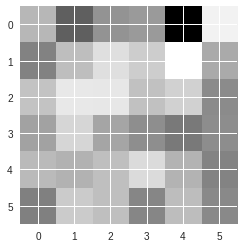

In [14]:
X = X_train_pca[0].reshape(6, 6)
plt.gray()
plt.imshow(X)

The data after PCA is not as interpretable because each

In [0]:
X_train_inv = pca.inverse_transform(X_train_pca)

In [16]:
X_train_inv.shape

(60000, 784)

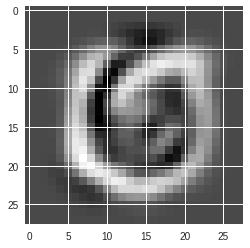

In [17]:
X = X_train_inv[0].reshape(28, 28)
plt.gray()
plt.imshow(X)